<a href="https://colab.research.google.com/github/Nithinan-Srikongphan/bsc_dpdm24/blob/main/Chapter_5_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Data**

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
apndx_data = '/content/drive/MyDrive/Data_BSC_DPDM24/apndx.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
apndx_data = pd.read_csv(apndx_data)
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [3]:
apndx_data.shape

(260000, 25)

In [4]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [5]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,NaN
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,NaN
259998,NaN


Data เก่าของคนที่ตายไปแล้ว เป็นมะเร็งแต่ไม่ได้รักษา

In [6]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,Hypertension,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,NaN,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,Hypertension,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,Hypertension,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,NaN,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,NaN,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,Hypertension,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,NaN,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,Diabetes,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [7]:
apndx_data['Treatment_Type']=apndx_data['Treatment_Type'].fillna('No')

**สงสัยว่า Symptom_Severity มีความเกี่ยวข้องไหม ควรเอาออกไหม**

In [8]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

**ได้อาการของ Symptom_Severity ได้แก่ 'Mild'(เล็กน้อย) , 'Moderate'(ปานกลาง), 'Severe'(มาก)**

In [9]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                     55174  ...   
                 Yes                                     9666  ...   
Moderate         No                                     38662  ...   
                 Yes                                     6935  ...   
Severe           No                                     16438  ...   
                 Yes                                     3038  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

##**ลบข้อมูลหลังจากที่รู้ว่าเป็นหรือไม่เป็นมะเร็งแล้ว**

In [10]:
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])

In [11]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No


##**ลบข้อมูลที่ไม่น่าจะใช้สร้าง Model ได้**

In [12]:
apndx_data = apndx_data.drop(columns=['Patient_ID', 'Country'])

In [13]:
apndx_data.shape

(260000, 20)

## **แปลง data ให้เป็นตัวเลขทั้งหมด**

In [14]:
# prompt: transform string into integer (Gender, Smoking_Status, Alcohol_Consumption)

# Assuming apndx_data is already loaded as a pandas DataFrame

# Create a mapping for string values to integers
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
smoking_mapping = {'No': 0, 'Yes': 1}
alcohol_mapping = {'Low': 0, 'Moderate': 1, 'Hight': 2}
Family_History_Cancer_mapping = {'No': 0, 'Yes': 1}
Genetic_Mutations = {'No': 0, 'Yes': 1}
Physical_Activity_Level = {'Low': 0, 'Moderate': 1, 'High': 2}
Radiation_Exposure = {'No': 0, 'Yes': 1}
Previous_Cancers = {'No': 0, 'Yes': 1}
Tumor_Markers = {'Negative': 0, 'Positive': 1}
Symptom_Severity = {'Mild': 0, 'Moderate': 1, 'Severe': 2}
Appendix_Cancer_Prediction = {'No': 0, 'Yes': 1}

# Apply the mappings to the DataFrame columns
apndx_data['Gender'] = apndx_data['Gender'].map(gender_mapping)
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(smoking_mapping)
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(alcohol_mapping)
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(Family_History_Cancer_mapping)
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(Genetic_Mutations)
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(Physical_Activity_Level)
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(Radiation_Exposure)
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(Previous_Cancers)
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(Tumor_Markers)
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(Symptom_Severity)
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(Appendix_Cancer_Prediction)

apndx_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  int64  
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  int64  
 4   Alcohol_Consumption         233834 non-null  float64
 5   Family_History_Cancer       260000 non-null  int64  
 6   Genetic_Mutations           260000 non-null  int64  
 7   Chronic_Diseases            129913 non-null  object 
 8   Physical_Activity_Level     260000 non-null  int64  
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  int64  
 11  Previous_Cancers            260000 non-null  int64  
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [15]:
# prompt: transform  Chronic_Diseases Gender  Diet_Type  using one-hot-encoder

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming apndx_data is already loaded and processed as shown in the previous code

enc = OneHotEncoder(handle_unknown='ignore')

# Select the columns to be one-hot encoded
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)

# Drop the original columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Display the updated DataFrame (optional)
apndx_data.head()


,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0.0,1,0,2,0,0,156,...,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0.0,0,0,0,0,0,117,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0.0,1,0,0,0,0,115,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0.0,0,0,2,0,1,149,...,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0.0,0,0,1,0,0,179,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#**เก็บ Test เอาไว้วัดผลตอนจบ**

In [16]:
# prompt: random sampling 60000 data and also keep the rest
from sklearn.model_selection import train_test_split

# Assuming apndx_data is your DataFrame
train_data, test_data = train_test_split(apndx_data, test_size=60000, random_state=6)
# prompt: random sampling 60000 data and also keep the rest
from sklearn.model_selection import train_test_split

# Assuming apndx_data is your DataFrame
train_data, test_data = train_test_split(apndx_data, test_size=60000, random_state=6)

print("train_data shape:", train_data.shape)
print("test_data shape:", test_data.shape)

train_data shape: (200000, 26)
test_data shape: (60000, 26)


In [17]:
train_data.groupby('Appendix_Cancer_Prediction').count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,152715,169786,169786,169786,169786,169786,169786,...,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,27202,30214,30214,30214,30214,30214,30214,...,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214


In [18]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_nan,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,45724,50927,50927,50927,50927,50927,50927,...,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,8193,9073,9073,9073,9073,9073,9073,...,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073


#**เลือก Model ที่ดีที่สุด (Model Selection)**



1.   Desision Tree
2.   (Short) Decision Tree
3.   Naiive Bayes



##**Split data into 10 folds (แบ่งข้อมูลเป็น 10 ก้อน)**

In [19]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=6)

In [20]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

#**Decision Tree**

รับข้อมูล str ไม่ได้ ต้องเปลี่ยนเป็นตัวเลขก่อน

In [21]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier = DecisionTreeClassifier() #default
#train & #evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [22]:
print("Cross-validation scores:", cv_scores)
print('Mean accuracy', cv_scores.mean())
print('Standard deviation', cv_scores.std())

Cross-validation scores: [0.7248  0.72915 0.72525 0.7259  0.72315 0.7252  0.7231  0.7268  0.72225
 0.7255 ]
Mean accuracy 0.72511
Standard deviation 0.0019010260387485572


#**(Short) Decision Tree**

In [23]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
#train & #evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [24]:
print("Cross-validation scores:", cv_scores)
print('Mean accuracy', cv_scores.mean())
print('Standard deviation', cv_scores.std())

Cross-validation scores: [0.84915 0.8486  0.84905 0.8488  0.84895 0.8506  0.84955 0.8494  0.8453
 0.8493 ]
Mean accuracy 0.84887
Standard deviation 0.0012984991336154135


#**Naiive Bayes**

In [25]:
#import
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
#define
nb_classifier = GaussianNB()
#train & #evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [26]:
print("Cross-validation scores:", cv_scores)
print('Mean accuracy', cv_scores.mean())
print('Standard deviation', cv_scores.std())

Cross-validation scores: [0.7247  0.7271  0.72535 0.72415 0.72305 0.7239  0.72565 0.72515 0.72325
 0.726  ]
Mean accuracy 0.7248300000000001
Standard deviation 0.0012073110618229341


# **เลือก Model ที่แม่นที่สุด คือ (Short) Decision Tree**

In [27]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
#train
dt_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

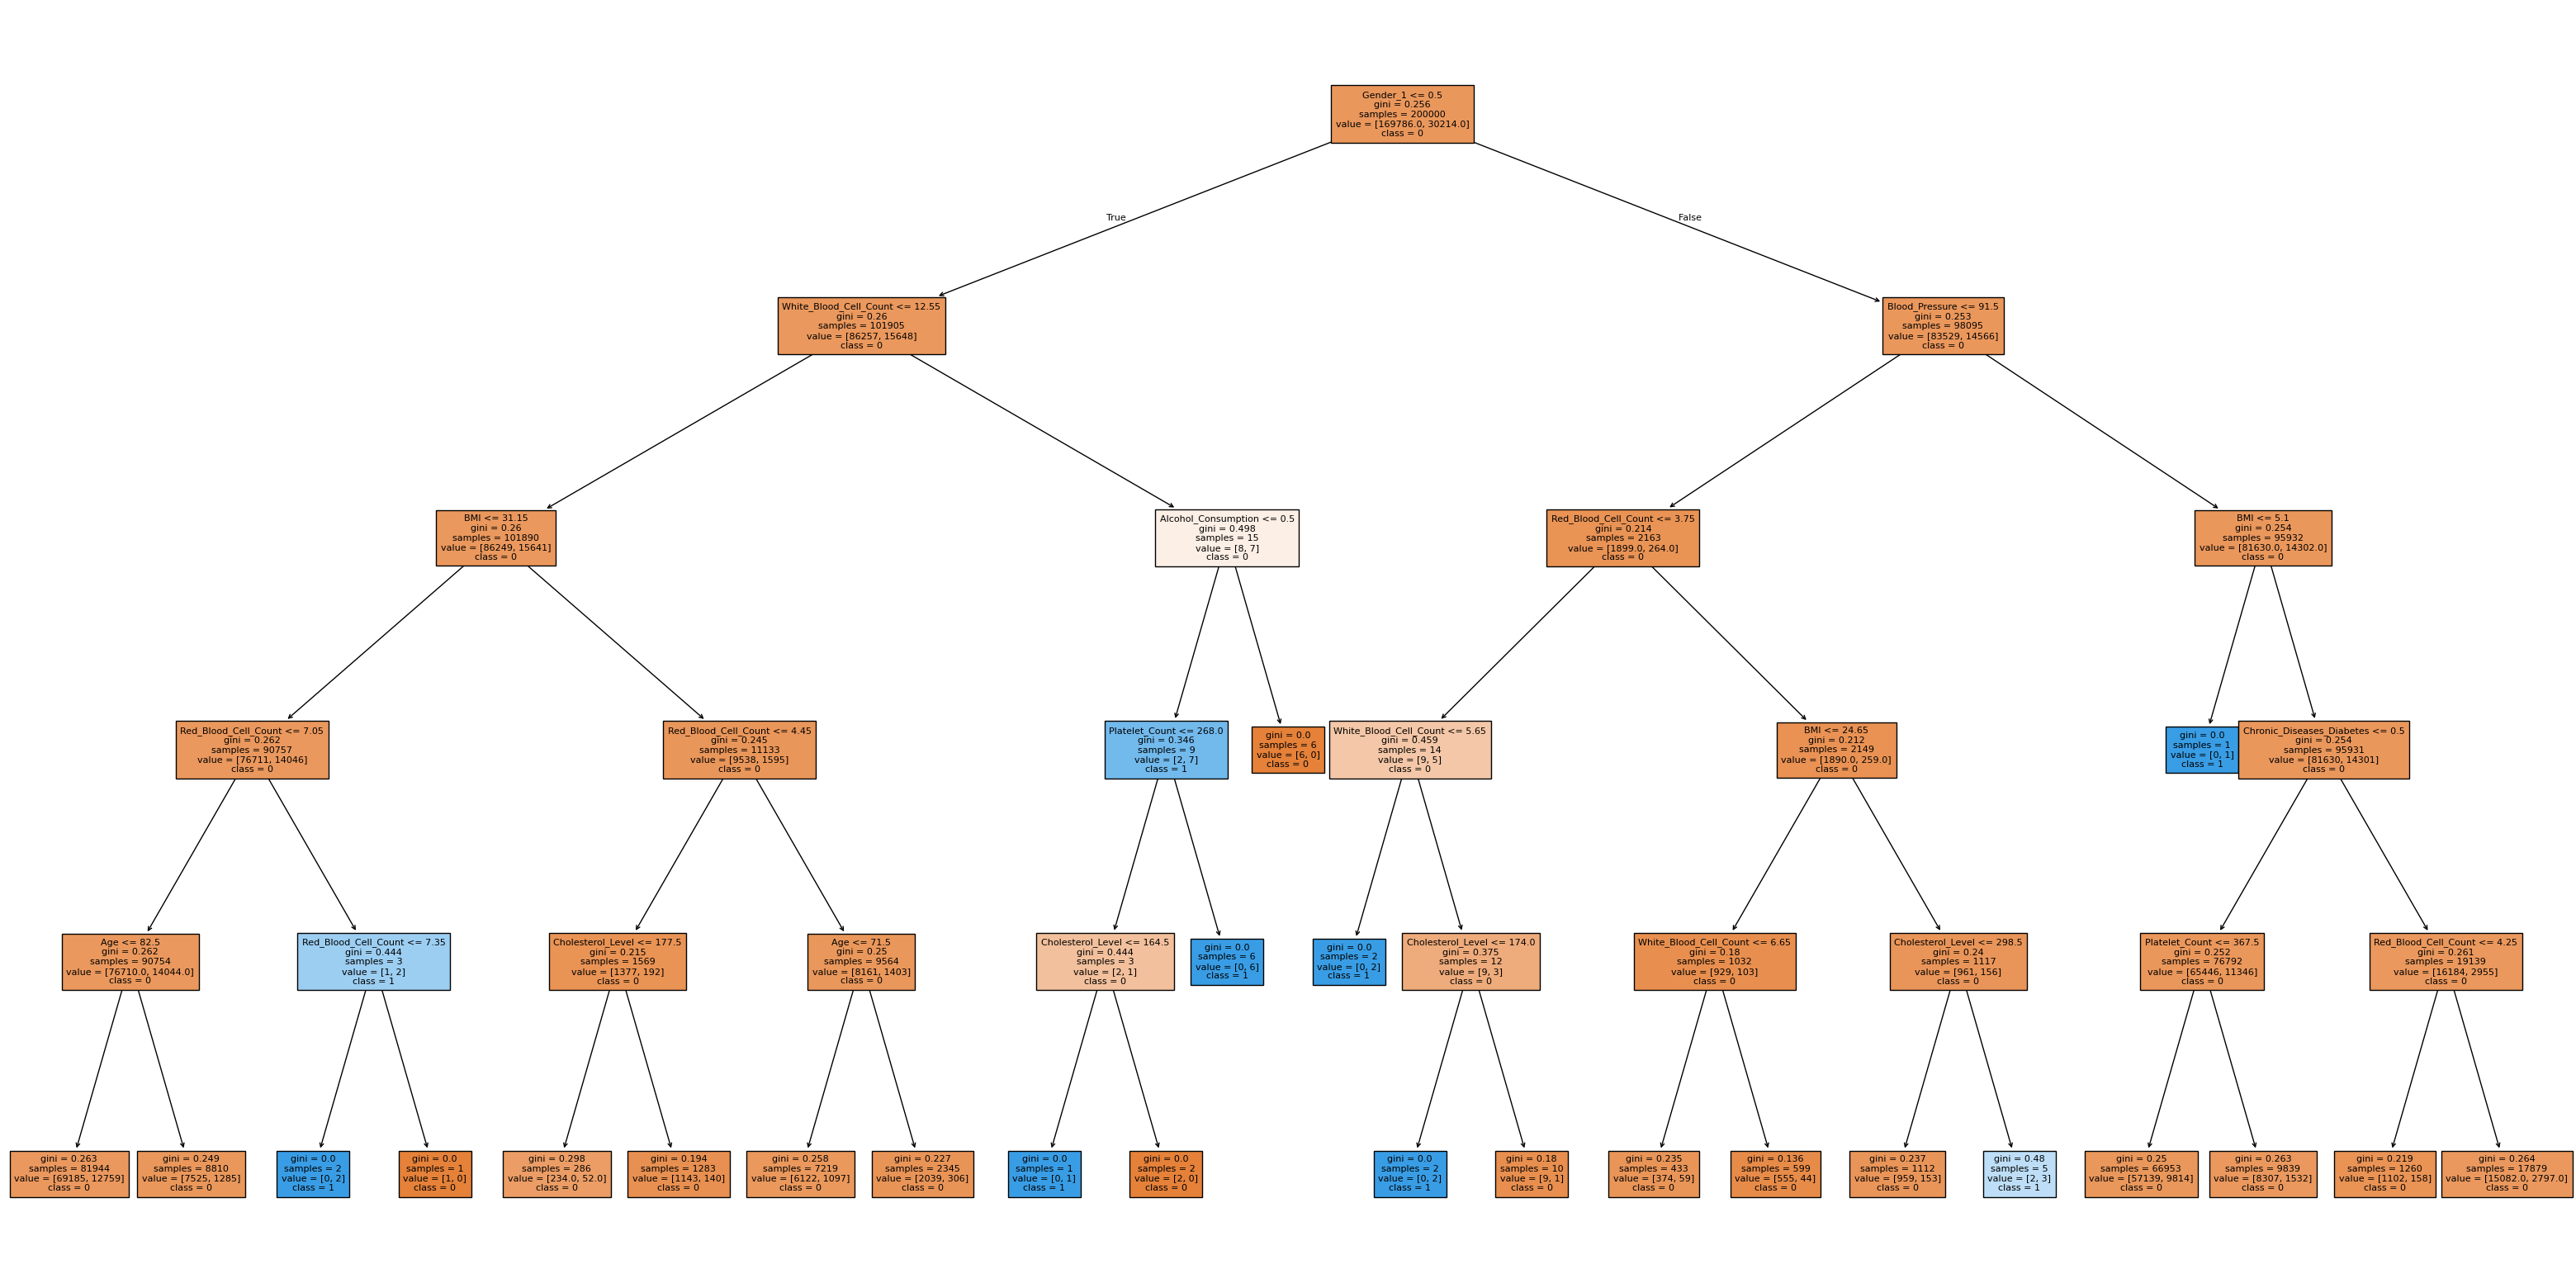

In [28]:
# prompt: show train tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
tree.plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0', '1'], fontsize=8)
plt.show()


#**วัดผลด้วย test data**

In [29]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1)
y_test = test_data['Appendix_Cancer_Prediction']

In [30]:
y_pred = dt_classifier2.predict(X_test)

In [31]:
#evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy}')

Accuracy on test data: 0.84875


#**Quiz12 หาต้นไม้ตัดสินใจที่มี average cross-validation accutacy มากกว่า 84.887%**

In [32]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier3 = DecisionTreeClassifier(max_depth=2)
#train & #evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier3, X_train, y_train, cv=kf, scoring='accuracy')

In [33]:
print("Cross-validation scores:", cv_scores)
print('Mean accuracy', cv_scores.mean())
print('Standard deviation', cv_scores.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.8488  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Mean accuracy 0.8489199999999999
Standard deviation 0.0012828094168659608


In [34]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier3 = DecisionTreeClassifier(max_depth=3)
#train
dt_classifier3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

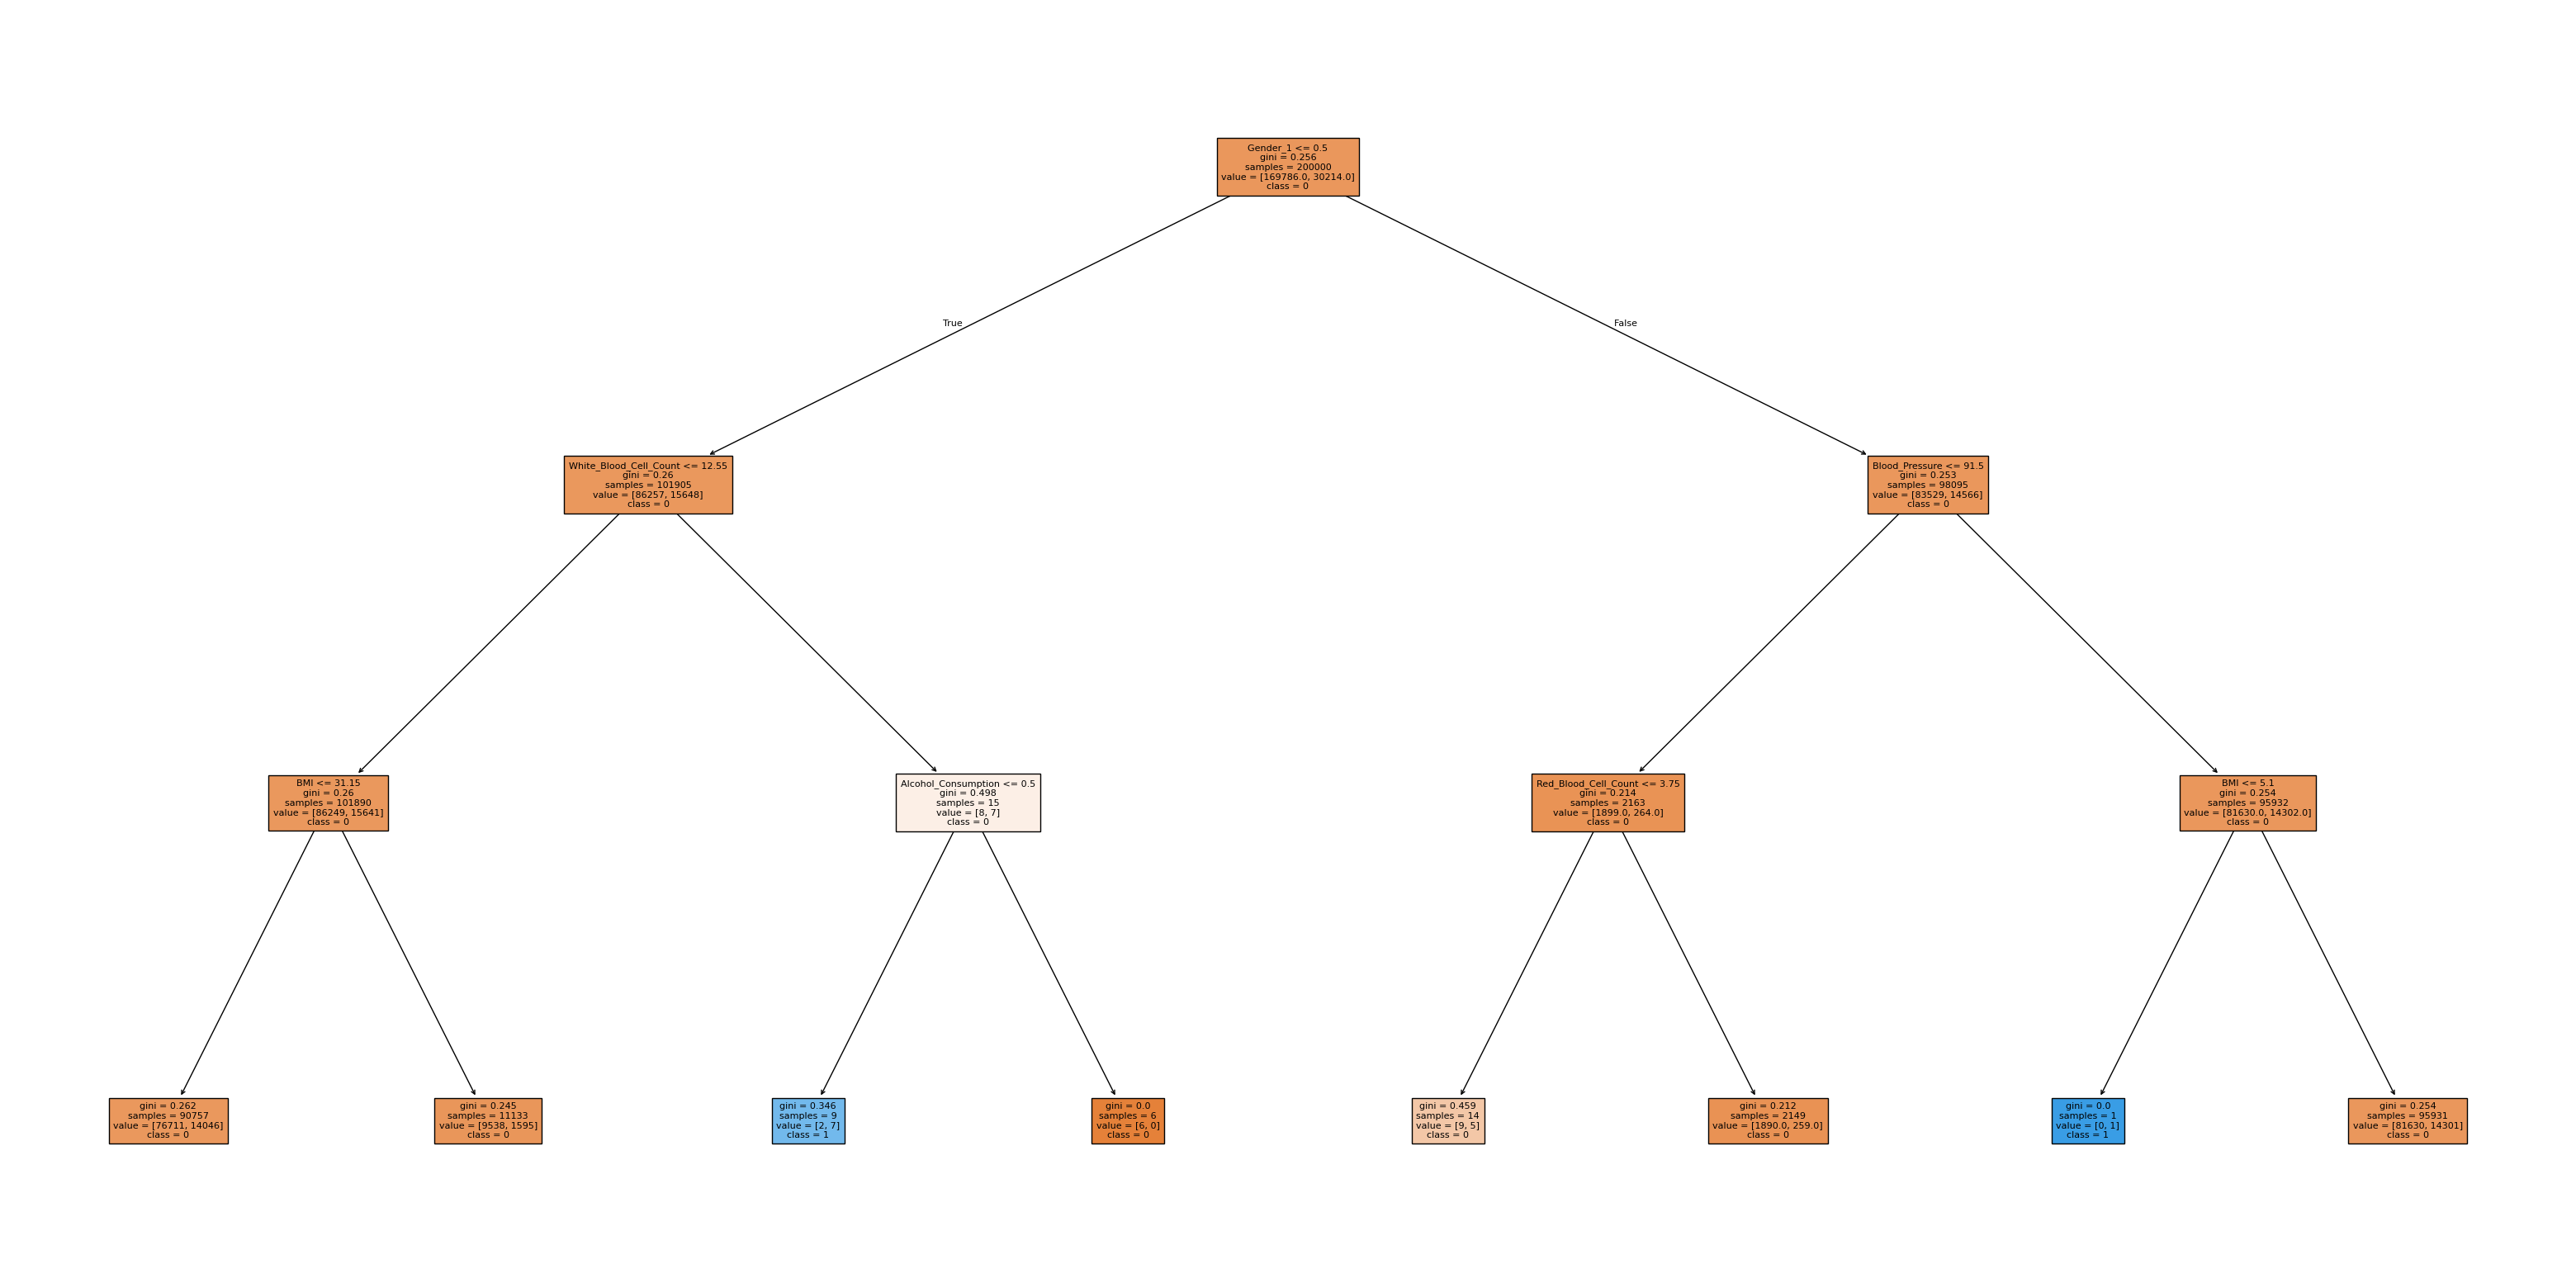

In [35]:
# prompt: show train tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
tree.plot_tree(dt_classifier3, filled=True, feature_names=X_train.columns, class_names=['0', '1'], fontsize=8)
plt.show()